In [28]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
words = open("names.txt", 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [30]:
# Vocabulary
chars = [c for c in '.abcdefghijklmnopqrstuvwxyz']

# Convertion between characters and integers
itos = {i: c for i, c in enumerate(chars)}
stoi = {c: i for i, c in enumerate(chars)}

In [48]:
block_size = 3 # how many characters do we take to predict the next one

X, Y = [], []
for w in words:
    context = [0] * block_size
    for c in w + '.':
        X.append(context.copy())
        Y.append(stoi[c])
        context = context[1:] + [stoi[c]]


In [32]:
X

[[0, 0, 0],
 [0, 0, 5],
 [0, 5, 13],
 [5, 13, 13],
 [13, 13, 1],
 [0, 0, 0],
 [0, 0, 15],
 [0, 15, 12],
 [15, 12, 9],
 [12, 9, 22],
 [9, 22, 9],
 [22, 9, 1],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 22],
 [1, 22, 1],
 [0, 0, 0],
 [0, 0, 9],
 [0, 9, 19],
 [9, 19, 1],
 [19, 1, 2],
 [1, 2, 5],
 [2, 5, 12],
 [5, 12, 12],
 [12, 12, 1],
 [0, 0, 0],
 [0, 0, 19],
 [0, 19, 15],
 [19, 15, 16],
 [15, 16, 8],
 [16, 8, 9],
 [8, 9, 1],
 [0, 0, 0],
 [0, 0, 3],
 [0, 3, 8],
 [3, 8, 1],
 [8, 1, 18],
 [1, 18, 12],
 [18, 12, 15],
 [12, 15, 20],
 [15, 20, 20],
 [20, 20, 5],
 [0, 0, 0],
 [0, 0, 13],
 [0, 13, 9],
 [13, 9, 1],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 13],
 [1, 13, 5],
 [13, 5, 12],
 [5, 12, 9],
 [12, 9, 1],
 [0, 0, 0],
 [0, 0, 8],
 [0, 8, 1],
 [8, 1, 18],
 [1, 18, 16],
 [18, 16, 5],
 [16, 5, 18],
 [0, 0, 0],
 [0, 0, 5],
 [0, 5, 22],
 [5, 22, 5],
 [22, 5, 12],
 [5, 12, 25],
 [12, 25, 14],
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 2],
 [1, 2, 9],
 [2, 9, 7],
 [9, 7, 1],
 [7, 1, 9],
 [1, 9, 12],
 [0, 0, 0],
 [0, 0, 5],
 [0

## Embeddings

In [49]:
# Vocabulary of size 27 and embbeding of 2 dimensions
C = torch.randn((27,2))
C

tensor([[-0.1177,  0.9859],
        [ 0.0065,  0.0346],
        [-1.2448, -0.1542],
        [-0.8243, -0.2305],
        [ 0.7600, -0.9843],
        [-2.6133,  0.0392],
        [-0.9717,  0.4839],
        [-1.4669,  0.2818],
        [ 1.6495,  0.5560],
        [ 0.6837,  0.3755],
        [ 0.1257, -0.0333],
        [ 0.2079,  0.7848],
        [-0.3290,  1.5316],
        [-0.6944,  0.6038],
        [ 1.1418,  0.8448],
        [-0.5134,  1.0713],
        [-1.4933,  0.2535],
        [ 0.3746, -0.1736],
        [ 0.5028,  0.0682],
        [ 0.8618,  1.1734],
        [ 2.0097,  0.3080],
        [ 0.4396,  0.4407],
        [ 1.5504, -0.3431],
        [-0.5575, -1.3250],
        [ 0.8425, -0.8022],
        [ 0.7667,  0.4733],
        [-0.1682,  0.9181]])

In [34]:
C[5]

tensor([-0.8393, -0.1388])

In [35]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.8393, -0.1388])

In [36]:
C[[5,6,7,7]]

tensor([[-0.8393, -0.1388],
        [ 0.3995,  1.0070],
        [ 0.5100,  0.9543],
        [ 0.5100,  0.9543]])

In [37]:
x = torch.tensor([[1, 2], [2, 1]])
x

tensor([[1, 2],
        [2, 1]])

In [38]:
C[x]

tensor([[[ 0.1607, -0.6618],
         [ 0.4185, -2.1254]],

        [[ 0.4185, -2.1254],
         [ 0.1607, -0.6618]]])

In [39]:
emb = C[X]
emb.shape

torch.Size([212, 3, 2])

## Hidden Layer
Inputs: 2 dimensional embbedings of 3 previous characters = 6

Number of neurons: 100 neurons as exampls

In [40]:
W1 = torch.randn((6, 100))
b1 = torch.randn((100,))

In [41]:
# torch.cat(torch.unbind(emb,1),1) # returns a list of tensors when we exclude the especified dimension

In [42]:
hidden_state = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)

In [43]:
hidden_state.shape

torch.Size([212, 100])

## Final Layer
input: 100 neurons from the previous layer

output: 27 possible characters to come next

In [44]:
W2 = torch.randn((100, 27))
b2 = torch.randn((27))

In [45]:
logits = hidden_state @ W2 + b2

In [46]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)


In [47]:
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [212]

## Grouping Everything

In [50]:
X[:10], Y[:10]

([[0, 0, 0],
  [0, 0, 5],
  [0, 5, 13],
  [5, 13, 13],
  [13, 13, 1],
  [0, 0, 0],
  [0, 0, 15],
  [0, 15, 12],
  [15, 12, 9],
  [12, 9, 22]],
 [5, 13, 13, 1, 0, 15, 12, 9, 22, 9])

In [59]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [79]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

In [80]:
# Number of parameters
sum(p.numel() for p in parameters)

3481

In [81]:
for p in parameters:
    p.requires_grad = True

In [75]:
# Optimize learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [76]:
losses = []

for i in range(1000):    
    
    #mini batch construct
    ix = torch.randint(0, X.shape[0], (32,))


    #Forward pass
    emb = C[X[ix]]
    hidden_state = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = hidden_state @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data -= p.grad * lr
print("loss: " , loss.item())

loss:  13.070147514343262


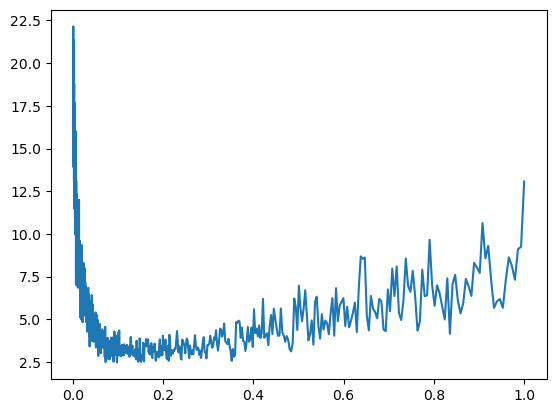

In [77]:
plt.plot(lrs, losses)

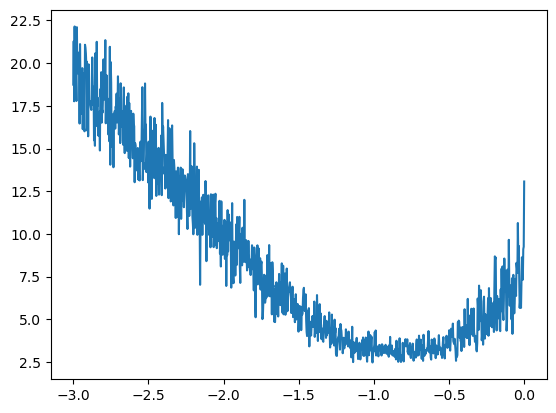

In [78]:
plt.plot(lre, losses)

With this you can find the best learning rate. In this case, around 0.1 (10^-1.0)

In [90]:
for i in range(10000):    
    
    #mini batch construct
    ix = torch.randint(0, X.shape[0], (32,))


    #Forward pass
    emb = C[X[ix]]
    hidden_state = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
    logits = hidden_state @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data -= p.grad * 0.01
print("loss: " , loss.item())

loss:  2.5628304481506348


In [91]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

2.317392587661743